In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')

In [17]:
df=pd.read_csv("../data/고객db_전처리.csv",index_col=0)

In [18]:
df.head(2)

,이름,생년월일,현재 나이,연령대,성별,휴대폰 번호,이메일,고객 구분,아이디,가입일,...,최근 구매 시점,최근 구매 요일,마지막 구매 이후 경과 기간,최근 구매 당시 나이,최근 거래 금액,선호 거래 방식,선호 구매 경로,차량 구매 횟수,신차 구매 지수,브랜드 충성도 지수
연번,,,,,,,,,,,,,,,,,,,,,
1,강주온,2002-03-04,23,20대 중반,남,010-6502-8753,janisi@himedia.co.kr,법인,14798,2023-04-01,...,2분기,평일,350,22,35490000,신용카드,오프라인,1,0.002,0.135
2,김경수,1983-01-02,42,40대 초반,남,010-1111-2222,kimkyoungsoo31@himedia.co.kr,법인,kyoungsoo031,2025-02-09,...,1분기,평일,38,42,84980000,신용카드,오프라인,5,0.508,0.037


In [56]:
# 연령별 신차구매지수 분석
index_df=df[["연령대","신차 구매 지수","고객 구분"]]

In [9]:
index_df.head(2)

,연령대,신차 구매 지수,고객 구분
연번,,,
1,20대 중반,0.002,법인
2,40대 초반,0.508,법인


In [11]:
index_df

,연령대,신차 구매 지수,고객 구분
연번,,,
43,60대 중반,0.043,개인
44,60대 중반,0.003,개인
45,40대 중반,0.006,개인
46,20대 후반,0.013,개인
47,30대 초반,0.004,개인
...,...,...,...
288,60대 후반,0.011,개인
289,40대 후반,0.047,개인
290,50대 후반,0.005,개인


In [57]:
# 연령대 별로 신차 구매 지수 평균 구하기
index_df=index_df.groupby(["연령대","고객 구분"])["신차 구매 지수"].mean().reset_index()

In [58]:
# 연령대 순서 정의
age_order = ['20대 초반', '20대 중반', '20대 후반', '30대 초반', '30대 중반', '30대 후반', 
             '40대 초반', '40대 중반', '40대 후반', '50대 초반', '50대 중반', '50대 후반', 
             '60대 초반', '60대 중반', '60대 후반',"70대 초반"]

# 연령대 컬럼을 Categorical로 변환하고 순서 지정
index_df['연령대'] = pd.Categorical(index_df['연령대'], categories=age_order, ordered=True)

# 연령대 기준으로 정렬
index_df=index_df.sort_values(by='연령대')


In [59]:
index_df

,연령대,고객 구분,신차 구매 지수
2,20대 초반,개인,0.038800
0,20대 중반,개인,0.044720
1,20대 중반,법인,0.039400
3,20대 후반,개인,0.034944
4,20대 후반,법인,0.007400
7,30대 초반,개인,0.012167
8,30대 초반,법인,0.003000
5,30대 중반,개인,0.020000
6,30대 중반,법인,0.068667
9,30대 후반,개인,0.027077


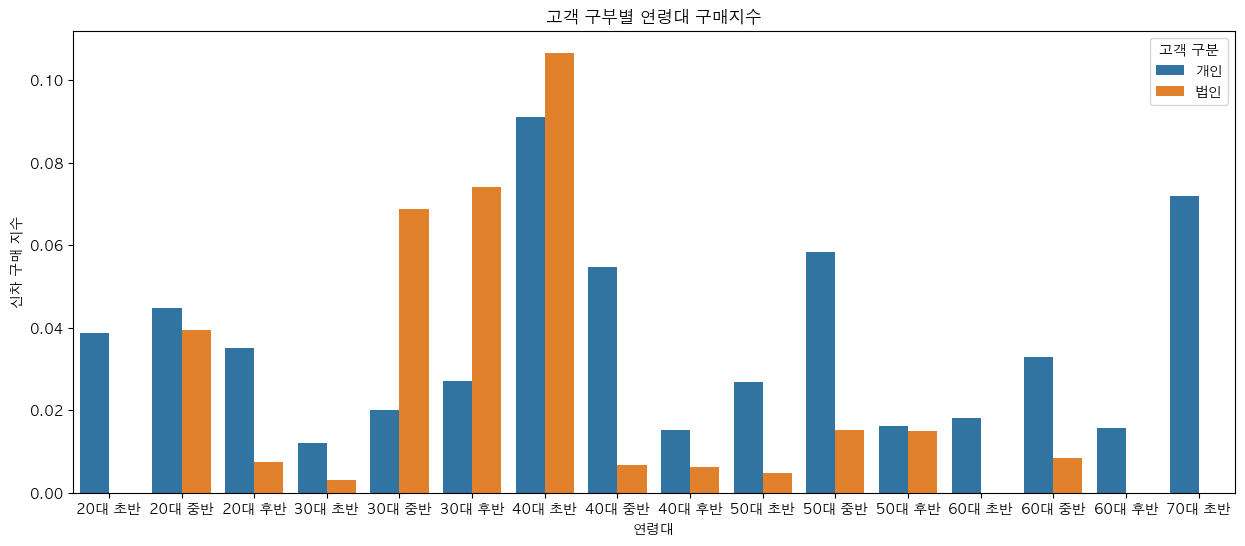

In [70]:
# 연령대별, 고객 구분별 신차 구매 지수 평균을 막대그래프로 시각화
plt.figure(figsize=(15,6))
sb.barplot(data=index_df,x="연령대",y="신차 구매 지수",hue="고객 구분")
plt.title("고객 구부별 연령대 구매지수")
plt.show()

In [61]:
# 연령별로 차량의 거래금액비교
price_df=df[["연령대","최근 거래 금액","고객 구분"]]

In [41]:
price_df

,연령대,최근 거래 금액,고객 구분
연번,,,
1,20대 중반,35490000,법인
2,40대 초반,84980000,법인
3,20대 중반,70600000,법인
4,60대 중반,40050000,법인
5,50대 중반,46100000,법인
...,...,...,...
288,60대 후반,89450000,개인
289,40대 후반,33120000,개인
290,50대 후반,70710000,개인


In [62]:
# 연령대별, 고객 구분별로 최근 거래 금액 평균 구하기
price_df=price_df.groupby(["연령대","고객 구분"])["최근 거래 금액"].mean().reset_index()

In [63]:
# 연령대 순서 정의
age_order = ['20대 초반', '20대 중반', '20대 후반', '30대 초반', '30대 중반', '30대 후반', 
             '40대 초반', '40대 중반', '40대 후반', '50대 초반', '50대 중반', '50대 후반', 
             '60대 초반', '60대 중반', '60대 후반',"70대 초반"]

# 연령대 컬럼을 Categorical로 변환하고 순서 지정
price_df['연령대'] = pd.Categorical(price_df['연령대'], categories=age_order, ordered=True)

# 연령대 기준으로 정렬
price_df=price_df.sort_values(by='연령대')

In [64]:
price_df

,연령대,고객 구분,최근 거래 금액
2,20대 초반,개인,5.204400e+07
0,20대 중반,개인,5.316960e+07
1,20대 중반,법인,4.382000e+07
3,20대 후반,개인,5.617611e+07
4,20대 후반,법인,4.708000e+07
7,30대 초반,개인,5.860833e+07
8,30대 초반,법인,2.606000e+07
5,30대 중반,개인,5.356222e+07
6,30대 중반,법인,8.847333e+07
9,30대 후반,개인,5.425923e+07


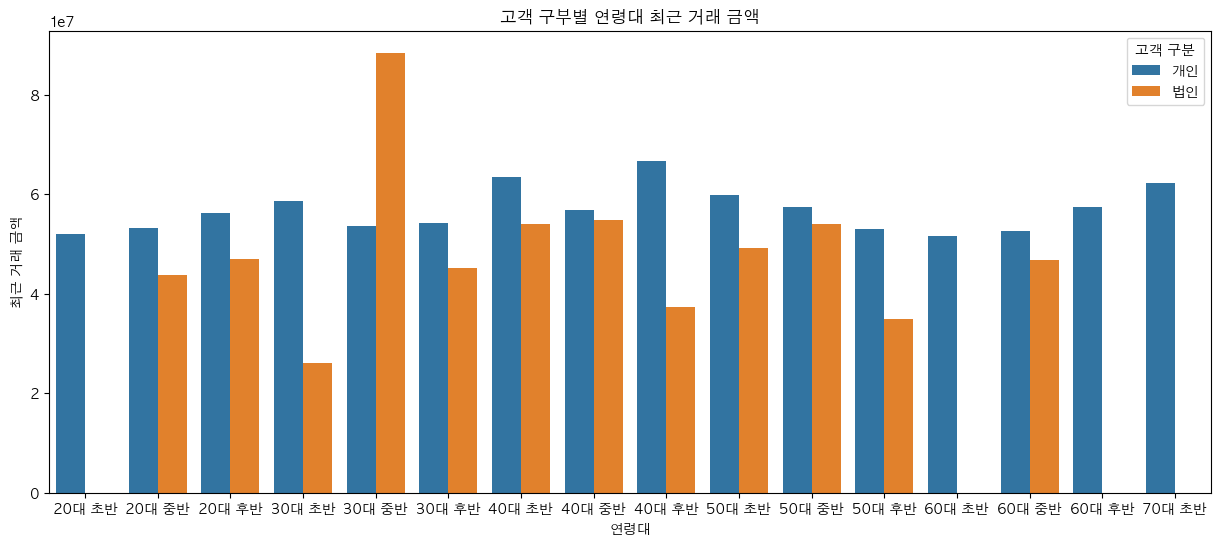

In [71]:
# 연령대별, 고객 구분별 최근 거래 금액 평균을 막대그래프로 시각화
plt.figure(figsize=(15,6))
sb.barplot(data=price_df,x="연령대",y="최근 거래 금액",hue="고객 구분")
plt.title("고객 구부별 연령대 최근 거래 금액")
plt.show()

In [ ]:
# 신차 구매 지수 분석
# 개인 고객은 20대 초반에서 50대 후반까지 비교적 고르게 분포되어 있으며, 40대 초반과 50대 중반에서 높은 구매 지수를 보인다.
# 법인 고객의 경우, 30대 중반부터 40대 초반에서 가장 높은 구매 지수를 기록하였으며, 이는 기업들이 법인 차량을 집중적으로 구매하는 연령대와 관련이 있을 수 있다.
# 60대 이상의 연령대에서는 개인 고객의 구매 비율이 상대적으로 높게 나타났으며, 법인 고객의 비중은 낮았다.

# 최근 거래 금액 분석
# 개인 고객은 전반적으로 연령대에 따라 균등하게 차량을 구매하는 경향을 보이며, 40대 초반과 50대 초반에서 거래 금액이 다소 높게 나타났다.
# 법인 고객은 30대 중반에서 가장 높은 거래 금액을 기록하였으며, 이는 이 시기의 법인 고객들이 상대적으로 고가의 차량을 구매하는 경향이 있음을 시사한다.
# 60대 후반과 70대 초반에서는 개인 고객의 구매 금액이 법인 고객보다 확연히 높게 나타나, 이 연령대의 소비자들이 차량 구매에 적극적인 모습을 보인다.

# 종합 분석
# 개인 고객은 연령대가 증가할수록 차량 구매 지수가 일정한 패턴을 보이며, 40~50대에서 가장 높은 구매율을 보인다. 이는 경제력이 안정된 시기의 소비 패턴과 일치한다.
# 법인 고객은 특정 연령대(30~40대 초반)에서 집중적으로 차량을 구매하는 경향이 있으며, 이는 기업 운영 및 차량 운용 계획과 밀접한 관련이 있을 것으로 추측된다.
# 연령대가 높아질수록 법인 고객의 구매 비율은 줄어들고, 개인 고객이 주도하는 시장으로 전환된다.
# 종합적으로 볼 때, 자동차 판매 전략 수립 시 연령별, 고객 유형별 특성을 고려하여 차별화된 마케팅 전략이 필요하다.